# COP Presentation - ArcGIS Python API 

## Splitting up a multi-layered feature service 

## and updating any web maps using those layers

This script was made because many of the layers published for SBOT projects were published to ArcGIS Online from ArcMap which, if you publish the layer all at once, does not give an option to split them into separate feature services. 

Now that these layer are going public, we need to have control over sharing and the ability to easily update the individual layers.

As such, a script was needed which would automate the process of splitting them up and making sure all the web maps referencing those layers would be updated.

This simple version of the script uses the Python API exclusively, however in some cases a more complex process is required to ensure popup and labeling info is not lost. That coomplex version uses to REST API to fill access and update pop-up info and labeling properties which are saved to the layer as opposed to the web map.


# Importing the modules we need and logging in.

In [ ]:
# Import AGO modules
from arcgis.gis import GIS
from arcgis.features import FeatureLayer
from arcgis.mapping import WebMap
# Import modules for running cells automatically
from IPython.display import Javascript, display, HTML

def nextCell():
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1, IPython.notebook.get_selected_index()+2)'))
def prevCell():
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()-1, IPython.notebook.get_selected_index())'))

# Log on to your ArcGIS online account, type in your username and password
username = input('Enter Username: ')
gis = GIS(username=username)



nextCell()

# Get feature service and web map IDs 

In [3]:
# Enter Item IDs to find correct feature service and web map(s)
FS_id = input('Feature Service ID: ')
WM_input = input('Web Map ID(s) (Use a comma to separate IDs): ')

nextCell()

Feature Service ID: 6694afae92ec46be97db804289950f3f
Web Map ID(s) (Use a comma to separate IDs): 0d4240de15ea4eddb2b3b213a98356fb


<IPython.core.display.Javascript object>

# Return the FS name and ask user to confirm

In [4]:
# Search for the feature service to be broken down into separate feature services
# Use item ID to search to ensure you get the right feature service
FS_search=gis.content.search("id:" + FS_id + " AND owner:" + username, item_type = "Feature Service", max_items=100)

# Check if feature service exists, and confirm with user if the correct feature service is selected
if len(FS_search) < 1:
    print ("WARNING: Did not find a feature service with ID" + FS_id + ". Please enter the feature service ID above this cell.")
    prevCell()
else:
    print (FS_search[0]['title'])
    SplitFS = ""
    while (SplitFS != "y" and SplitFS != "n"):
        print("Publish this feature service's layers separately? (y/n)")
        SplitFS=input()
        if (SplitFS != "y" and SplitFS != "n"):
            print("Please enter y or n.")
    if SplitFS == "y":
        print ('Will publish ' + FS_search[0]['title'] + ' layers as individual feature services')
        print ('\n')
        nextCell()
    elif SplitFS =="n":
        print("Please enter the feature service ID above this cell.")
        # Run previous cell
        prevCell()



Sturgeon_Habitats
Publish this feature service's layers separately? (y/n)
y
Will publish Sturgeon_Habitats layers as individual feature services




<IPython.core.display.Javascript object>

# Return web map name(s) and ask user to confirm

In [5]:
# Search for the web map containing the layers to be changed 
# Use item ID to search to ensure you get the right web maps
WM_list = WM_input.split(",")
WM_ids = []
WM_names = []
for WM_id in WM_list:
    wm_search = gis.content.search("id:" + WM_id + " AND owner:" + username, item_type = "Web Map", max_items=100)
# Check if each web map exists, and confirm with user if the correct web maps are selected
    if len(wm_search) < 1:
        print ("WARNING: Did not find a web map with ID " + WM_id + ". Please enter the web map ID(s) above this cell.")
        prevCell()
    else:
        print (wm_search[0]['title'])
        UpdateMap = ""
        while (UpdateMap != "y" and UpdateMap != "n"):
            print("Update this map? (y/n)")
            UpdateMap=input()
            if (UpdateMap != "y" and UpdateMap != "n"):
                print("Please enter y or n.")
        if UpdateMap == "y":
            print ('Will update map:' + wm_search[0]['title'])
            WM_ids.append(WM_id)
            WM_names.append(wm_search[0]['title'])
            print ('\n')
        elif UpdateMap =="n":
            print("Please enter the web map ID(s) above this cell.")
            # Run previous cell
            prevCell()
            continue

# Summary
print ('Summary')
print ('Feature Service: ' + FS_search[0]['title'])
print ('Web Map(s): ' + str(WM_names))
print ('If these are the correct feature service and web maps, run the next cell. Ready when you are.')

Sturgeon_Habitats-5
Update this map? (y/n)
y
Will update map:Sturgeon_Habitats-5


Summary
Feature Service: Sturgeon_Habitats
Web Map(s): ['Sturgeon_Habitats-5']
If these are the correct feature service and web maps, run the next cell. Ready when you are.


# Let's have a look at some of the ArcGIS API classes we will use in this script

## arcgis.gis.item

<Item title:"Sturgeon_Habitats" type:Feature Layer Collection owner:BHUDSON.BC>
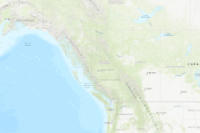

In [6]:
FS = FS_search[0]
FS

In [11]:
fsSharing = FS.shared_with
fsSharing

{'everyone': False, 'org': False, 'groups': []}

In [8]:
FS.share(everyone=False,org=False, groups=["SC Demo"])

{'notSharedWith': [''], 'itemId': '6694afae92ec46be97db804289950f3f'}

In [10]:
FS.unshare(groups=["SC Demo"])

{'notUnsharedFrom': [''], 'itemId': '6694afae92ec46be97db804289950f3f'}

### A couple others that take too long to demo

#### arcgis.gis.item.export
Exports a service item to the specified export format. Available only to users with an organizational subscription. Invokable only by the service item owner or an administrator. 

Formats include: Shapefile, CSV, FGDB, Feature Collection, ***GeoJSON***, Scene Package, KML

#### arcgis.gis.item.publish

Publishes a hosted service based on an existing source item (this item)



## arcgis.mapping.WebMap

In [ ]:
wm_item = wm_search[0]
wm_item


In [13]:
wm_obj = WebMap(wm_item)
wm_obj

MapView(hide_mode_switch=True, layout=Layout(height='400px', width='100%'))

In [14]:
 wm_obj.definition.operationalLayers

[{
   "id": "16e89d8d3c2-layer-1",
   "layerType": "ArcGISFeatureLayer",
   "url": "https://services6.arcgis.com/ubm4tcTYICKBpist/arcgis/rest/services/Sturgeon_Habitats/FeatureServer/4",
   "visibility": true,
   "opacity": 1,
   "title": "Sturgeon_Habitats - SpawningHabitat",
   "itemId": "6694afae92ec46be97db804289950f3f",
   "layerDefinition": {
     "drawingInfo": {
       "renderer": {
         "type": "simple",
         "symbol": {
           "color": null,
           "outline": {
             "color": [
               230,
               0,
               169,
               255
             ],
             "width": 1.875,
             "type": "esriSLS",
             "style": "esriSLSSolid"
           },
           "type": "esriSFS",
           "style": "esriSFSSolid"
         }
       },
       "scaleSymbols": true
     }
   },
   "popupInfo": {
     "title": "White Sturgeon Spawning Habitat: {NAME}",
     "fieldInfos": [
       {
         "fieldName": "OBJECTID",
         "lab

### If we look at the layer URLs we can see that they are all part of the same feature service - "Sturgeon Habitat"

In [15]:
for layer in wm_obj.definition.operationalLayers:
    print(layer.url)


https://services6.arcgis.com/ubm4tcTYICKBpist/arcgis/rest/services/Sturgeon_Habitats/FeatureServer/4
https://services6.arcgis.com/ubm4tcTYICKBpist/arcgis/rest/services/Sturgeon_Habitats/FeatureServer/3
https://services6.arcgis.com/ubm4tcTYICKBpist/arcgis/rest/services/Sturgeon_Habitats/FeatureServer/2
https://services6.arcgis.com/ubm4tcTYICKBpist/arcgis/rest/services/Sturgeon_Habitats/FeatureServer/1
https://services6.arcgis.com/ubm4tcTYICKBpist/arcgis/rest/services/Sturgeon_Habitats/FeatureServer/0


## arcgis.features.FeatureLayer

In [16]:
token = gis._con.token
lyr = FS.layers[0]

linkURL = "'"+lyr.url + "?token="+token+"'"
display(linkURL)
display(HTML("<a href="+linkURL+"""target="_blank">Layer URL</a>"""))


"'https://services6.arcgis.com/ubm4tcTYICKBpist/arcgis/rest/services/Sturgeon_Habitats/FeatureServer/0?token=1hIjlliUu-86ES8ua-qj3q10brLQwKfqa3IofACx0ViOp62bjiS0U7I13ekaRQSeJuVaYtn3Ecz_7gfhXGi4PRHuvM8XpnsTIEpqVW3a90KXgUmqCa0c5a-zrB_5wMBJ'"

In [21]:
lyr.properties

{
  "currentVersion": 10.7,
  "id": 0,
  "name": "AdultSubadultHabitat",
  "type": "Feature Layer",
  "serviceItemId": "6694afae92ec46be97db804289950f3f",
  "displayField": "Name",
  "description": "AdultSubadultHabitat_WebMercator",
  "copyrightText": "",
  "defaultVisibility": true,
  "editingInfo": {
    "lastEditDate": 1574441322809
  },
  "relationships": [],
  "isDataVersioned": false,
  "supportsAppend": true,
  "supportsCalculate": true,
  "supportsASyncCalculate": true,
  "supportsTruncate": true,
  "supportsAttachmentsByUploadId": true,
  "supportsAttachmentsResizing": true,
  "supportsRollbackOnFailureParameter": true,
  "supportsStatistics": true,
  "supportsExceedsLimitStatistics": true,
  "supportsAdvancedQueries": true,
  "supportsValidateSql": true,
  "supportsCoordinatesQuantization": true,
  "supportsFieldDescriptionProperty": true,
  "supportsQuantizationEditMode": true,
  "supportsApplyEditsWithGlobalIds": false,
  "supportsMultiScaleGeometry": true,
  "supportsRetu

### arcgis.features.FeatureLayer.manager

In [18]:
lyr.manager.update_definition({"minScale": 0})


{'success': True}

# Now let's run it 


In [22]:
# Grab feature service's properties, publish new FSs and apply properties to new FSs
# The FS_search should only return one, so we grab the first
FS = FS_search[0]
# If the FS has more than one Layer, export each layer to a JSON and republish as individual Feature Services
if len(FS.layers) > 1:    
    fsSharing = FS.shared_with
    for lyr in FS.layers:
        print ("Working on ", lyr.properties.name)
        # Access old feature service's URL and properties for itemId, visibility range, and symbology
        old_URL = lyr.url
        old_ID = lyr.properties.serviceItemId
        
        old_minScale = lyr.properties['minScale']
        old_maxScale = lyr.properties['maxScale']
        old_drawingInfo = lyr.properties['drawingInfo']
        # print(old_URL, old_ID)
        
        # Publish layer as a new feature service and share (Uses Python API)
        layer_name = lyr.properties.name + "_ind"
        print("Exporting Layer ID:", lyr.properties.id , ", Name:", lyr.properties.name, "to GeoJSON")
        # Export the layer to GeoJSON (this will be stored on ArcGIS online)     
        GeoJSON = FS.export(title=lyr.properties.name, export_format="GeoJson", parameters={"layers":[{"id":lyr.properties.id}]})
        print("GeoJSON Export Complete")
        # Publish the GeoJSON to a Feature Service
        print("Publishing Layer ID:", lyr.properties.id , ", Name:", lyr.properties.name, "GeoJSON to feature service")
        new_FS = GeoJSON.publish({"name":layer_name})
        print("Publishing feature service Complete")
        # Share the new feature service with the same groups as the original feature service
        new_FS.share(fsSharing["everyone"],fsSharing["org"],fsSharing["groups"])

        # Apply visibility range and symbology to new feature service's layer (Uses Python API)
        new_FS.layers[0].manager.update_definition({"minScale": old_minScale})
        new_FS.layers[0].manager.update_definition({"maxScale": old_maxScale})
        new_FS.layers[0].manager.update_definition({"drawingInfo": old_drawingInfo})
        
        new_URL = new_FS.layers[0].url
        new_ID = new_FS.layers[0].properties.serviceItemId
        # print(new_URL, new_ID)
        GeoJSON.delete()
    
        print ("Published ", lyr.properties.name)
        
        # Replace source of old layer in each web map
        for WM_id in WM_ids:
            wm_search = gis.content.search("id:" + WM_id + " AND owner:" + username, item_type = "Web Map", max_items=100)
            wm_item = wm_search[0]
            wm_obj = WebMap(wm_item)

            # Create index for web map layers,
            # since web map definition operational layers are in reverse order
            # def_ol_index = len(wm_obj.definition.operationalLayers) - (1 + lyr.properties.id)

            # Update layer URL and itemId (Uses Python API)
            for operationalLayer in wm_obj.definition.operationalLayers:
                if operationalLayer.url == old_URL:
                    operationalLayer.url = new_URL
                    operationalLayer.itemId = new_ID
                    wm_obj.update()

Working on  AdultSubadultHabitat
Exporting Layer ID: 0 , Name: AdultSubadultHabitat to GeoJSON
GeoJSON Export Complete
Publishing Layer ID: 0 , Name: AdultSubadultHabitat GeoJSON to feature service
Publishing feature service Complete
Published  AdultSubadultHabitat
Working on  EulachonSpawningHabitat
Exporting Layer ID: 1 , Name: EulachonSpawningHabitat to GeoJSON
GeoJSON Export Complete
Publishing Layer ID: 1 , Name: EulachonSpawningHabitat GeoJSON to feature service
Publishing feature service Complete
Published  EulachonSpawningHabitat
Working on  JuvenileHabitat
Exporting Layer ID: 2 , Name: JuvenileHabitat to GeoJSON
GeoJSON Export Complete
Publishing Layer ID: 2 , Name: JuvenileHabitat GeoJSON to feature service
Publishing feature service Complete
Published  JuvenileHabitat
Working on  SpawningClosure
Exporting Layer ID: 3 , Name: SpawningClosure to GeoJSON
GeoJSON Export Complete
Publishing Layer ID: 3 , Name: SpawningClosure GeoJSON to feature service
Publishing feature service 

In [23]:
# How to access an item's JSON with REST API
# The complex version of this script uses the rest API to access additional item information 
# like popup info and label properties which cannot be access using the Python API

import urllib.request
import json

# Get a token
token = gis._con.token
print ('Token: ' + token)

FS = FS_search[0]
portalUrl = "https://governmentofbc.maps.arcgis.com"
params = urllib.parse.urlencode({'token' : token,'f' : 'json'})

# Access old feature service's JSON for layer definition and popupInfo (Uses REST API)
reqUrl = (portalUrl + '/sharing/content/items/' + FS.id +'/data?' + params)
itemDataReq = urllib.request.urlopen(reqUrl).read()

# Decode UTF-8 bytes to Unicode, and convert single quotes 
# to double quotes to make it valid JSON
my_json = itemDataReq.decode('utf8').replace("'", '"')


# Load the JSON to a Python list & dump it back out as formatted JSON
data = json.loads(my_json)
s = json.dumps(data, indent=4, sort_keys=False)
print(s)


Token: 1hIjlliUu-86ES8ua-qj3q10brLQwKfqa3IofACx0ViOp62bjiS0U7I13ekaRQSeJuVaYtn3Ecz_7gfhXGi4PRHuvM8XpnsTIEpqVW3a90KXgUmqCa0c5a-zrB_5wMBJ
{
    "layers": [
        {
            "id": 0,
            "layerDefinition": {
                "drawingInfo": {
                    "renderer": {
                        "type": "simple",
                        "symbol": {
                            "type": "esriSFS",
                            "style": "esriSFSSolid",
                            "color": [
                                209,
                                252,
                                220,
                                255
                            ],
                            "outline": {
                                "type": "esriSLS",
                                "style": "esriSLSSolid",
                                "color": [
                                    110,
                                    110,
                                    110,
     

In [ ]:
# How to update an items JSON with the REST API

modRequest = urllib.request.urlopen(portalUrl + '/sharing/content/users/'+ username +'/items/' + itemId + 
                                        '/update?' + params,
                                        ((urllib.parse.urlencode({'text' : newJSON})).encode('utf-8')))